# Distribuição Marginal e Condicional

Neste exercício você deverá obter uma distribuição condicional e uma marginal do conjunto de dados apresentado. 


Lembre-se que, como não estamos lidando com funções propriamente ditas, encontrar um valor específico de $x$ pode não dar resultado. O que faz sentido, em variáveis contínuas, é um pequeno intervalo entre $x$ e $x+dx$. 

Nos exercícios abaixo a sugestão é usar $dx=0.05$.

In [1]:
#dê <shift>+<enter>
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#dê <shift>+<enter>
myx = np.random.normal(6.0,1.0,size=10**6)
noise = np.random.normal(3,0.4,size=10**6)
myy = (np.sin(myx))**2+noise

/tmp/ipykernel_5681/845017836.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bins=np.array([bx,by])


Text(0, 0.5, 'f(x,y)')

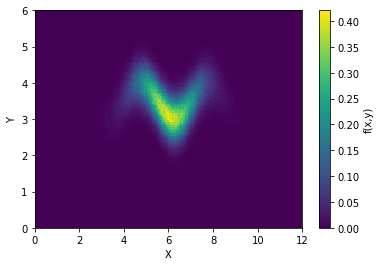

In [3]:
#dê <shift>+<enter>
bx = np.linspace(0,12,240)
by = np.linspace(0,6,120)
bins=np.array([bx,by])
plt.hist2d(myx,myy,bins=bins, density=True)
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('f(x,y)')

## Exercício

Encontre (graficamente):
1. A distribuição marginal $f(x)$
2. As distribuições condicionais $f(x|y=3)$ e $f(x|y=4)$. Compare as duas. Que conclusões pode tirar?
3. As distribuições condicionais $f(y|x=4)$ e $f(y|x=6)$. Compare as duas. Que conclusões pode tirar?
4. A distribuição marginal $f(y)$

## Disclaimer
Professor, peço que ignore tudo o que estiver nessa célula. Se trata de um recado para eu mesmo, para que no futuro eu saiba o que eu fiz para conseguir importar o ROOT dentro do Jupyter:

i)Apenas utilizar 'import ROOT' não basta, o ROOT tem que estar instalado no computador(parece óbvio agora, mas não era quando eu tentei)

ii)Se você compilar o ROOT utilizando os arquivos do site, muito provavelmente ele será compativel apenas com o Python2(python nativo do Linux)

iii)Muito provavelmente o Jupyter será compativel apenas com o Python3, uma vez que o Python2 já está sendo descontinuado(as profecias disseram que esse dia chegaria, mas nós não acreditamos)

iv)Temos um problema. PyROOT funcionando em Python2 e Jupyter em Python3. """SOLUÇÃO""":

    1)Instalar o Anaconda
    2)Criar um ambiente com Python2
    3)Entrar nesse ambiente
    4)Executar o Jupyter
    5)Mudar o kernel de Python3 para Python2 dentro do notebook: Kernel -> Change kernel -> Python2
PROBLEMA: isso vai fazer com que o ROOT rode dentro do notebook, mas todas as instruções referentes ao Python3 vão ficar malucas e vão parar de funcionar.

v)Solução de verdade: abri um post no fórum do ROOT pedindo ajuda. Um cara chamado James Carroll sugeriu que eu desinstalasse o ROOT e instalasse de novo usando o Snappy(software de implantação). Aparentemente ele é o cara que adaptou o ROOT ao Snappy.
Link do post:
https://root-forum.cern.ch/t/not-able-to-use-pyroot-in-python3/48991
Funciona!

vi)Agora, para abrir um notebook compativel com Python3 e ROOT é necessário digitar no terminal:
    root --notebook

## Solução

### 1. Encontre a distribuição marginal $𝑓(𝑥)$

Vamos atacar o problema utilizando a capacidade do ROOT de lidar com histogramas. Para isso devemos primeiro importa-lo:

In [4]:
import ROOT

Welcome to JupyROOT 6.26/00


Em seguida vamos criar um histograma 2D para receber os dados do problema. 

Importante: devemos criar o histograma com o mesmo número de bins do heatmap, assim tudo fica com a mesma "cara". 

Uma outra observação: a sintaxe do PyROOT é ligeiramente diferente daquela do ROOT, ao invés de utilizarmos 'TH2F *h = new TH2F' para criarmos um hist 2D, usamos  'h = ROOT.TH2F'. Os parâmetros que passamos para o método são os mesmos nas duas formas.

In [5]:
hist = ROOT.TH2F("hist","Histograma 2D das V.A X e Y; X(u.a); Y(u.a)",240, 0, 12, 120, 0, 6);
hist.GetXaxis().SetTitleOffset(1.5)
hist.GetYaxis().SetTitleOffset(1.5)
#hist.SetStats(0)

Podemos agora exibir o histograma:

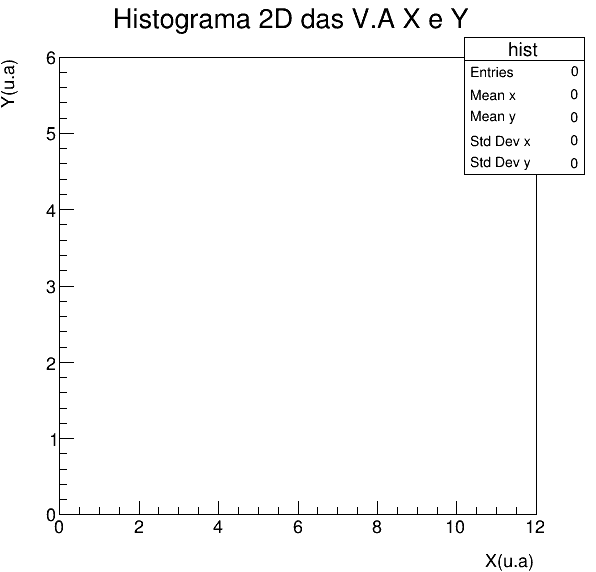

In [6]:
c = ROOT.TCanvas("canvas","canvas",600,600)
hist.Draw()
c.Draw()

Não tem muita coisa pra ser vista nesse histograma, precisamos preenche-lo com os dados gerados:

In [7]:
#Percorre todos as posições de myx e myy
for i in range(10**6):
    #Preenche o hist
    hist.Fill(myx[i],myy[i])

#Liga o JavaScript para uma visualização interativa    
%jsroot on

#Desenha o histograma com a opção "colz", ie, mapa de calor
hist.Draw("colz")

#Desenha a tela
c.Draw()

Agora que temos os dados em um histograma 2D do ROOT podemos começar o nosso tratamento. Queremos obter a distribuição marginal $f(x)$. Sabemos que formalmente essa distribuição é dada por
$$f(x) = \int_{-\infty}^{+\infty} f(x,y) dy$$
onde $f(x,y)$ é a distribuição conjunta que acabamos de plotar através do histograma 2D.

Notemos que não precisamos integrar de $-\infty$ a $+\infty$, uma vez que os valores da variável aleatória Y variam no intervalo $\left[0,6\right]$.

Existe um comando no ROOT que realiza exatamente isso, é o comando de *Projeção*. Podemos usar ele para projetarmos um histograma 2D em um dos eixos levando em consideração apenas um pequeno intervalo(usaremos isso para construir as distribuição condicionais) ou em todo o espaço amostral(no caso da probabilidade marginal).

Sendo assim, podemos obter graficamente $f(x)$ fazendo:

In [8]:
#Faz a projeção X do hist 2D em um histograma 1D chamado hx_marg. Notemos que todo o eixo X foi utilizado: 
hx_marg = hist.ProjectionX()

#Define um novo título
hx_marg.SetTitle("Dist.marginal de X")

#Define os títulos dos eixos(o título do eixo X já seria "herdado" pela projeção...)
hx_marg.GetXaxis().SetTitle("X(u.a)")
hx_marg.GetYaxis().SetTitle("Contagem")

#Define o espaçamento das legendas dos eixos
hx_marg.GetXaxis().SetTitleOffset(1.5)
hx_marg.GetYaxis().SetTitleOffset(1.5)

#Desenha o histograma
hx_marg.Draw()

#Desenha a tela
c.Draw()

### 2. Encontre as distribuições condicionais $f(x|y=3)$ e $f(x|y=4)$. Compare as duas. Que conclusões pode tirar?

Para isso, devemos saber em quais bins estão localizados os valores $y=3$ e $y=4$. Olhando no histograma da distribuição conjunta (o JavaScript ajudou muito nisso...) vemos que:

i)O bin 60 contém os valores de Y no intervalo $\left[ 3,3.050\right]$

ii)O bin 80 contém os valores de Y no intervalo $\left[ 4,4.050\right]$


Como apresentado no começo do notebook, não estamos lidando com funções própriamente ditas logo devemos considerar um intervalo. Nesse caso usaremos um intervalo da largura do próprio bin, ie, consideraremos $dx = 0.05$


Para obtermos as distribuições condicionais usaremos novamente o comando de *Projeção*, com a diferença que agora projetaremos o histogram 2D em um bin específico, o que significa dizer que projetaremos no intervalo $\left[ x,x+dx\right]$:

In [9]:
hx_cond_3 = hist.ProjectionX(name = "_px",firstybin=60, lastybin=60)
hx_cond_3.SetTitle("Dist.condicional de X (y=3)")
hx_cond_3.GetXaxis().SetTitle("X(u.a)")
hx_cond_3.GetYaxis().SetTitle("Contagem")
hx_cond_3.GetXaxis().SetTitleOffset(1.5)
hx_cond_3.GetYaxis().SetTitleOffset(1.5)

hx_cond_3.Draw()

c.Draw()

In [10]:
hx_cond_4 = hist.ProjectionX(name = "_px",firstybin=80, lastybin=80)
hx_cond_4.SetTitle("Dist.condicional de X (y=4)")
hx_cond_4.GetXaxis().SetTitle("X(u.a)")
hx_cond_4.GetYaxis().SetTitle("Contagem")
hx_cond_4.GetXaxis().SetTitleOffset(1.5)
hx_cond_4.GetYaxis().SetTitleOffset(1.5)


hx_cond_4.Draw()

c.Draw()

Com isso vemos que ambas as distribuições condicionais diferem, o que indica uma dependência da V.A X com respeito a V.A Y

### 3. As distribuições condicionais $f(y|x=4)$ e $f(y|x=6)$. Compare as duas. Que conclusões pode tirar?

Aqui iremos adotar a mesma abordagem, com a diferença de que iremos projetar agora em x. 

Olhando no histograma da distribuição conjunta notamos que:

i)O bin 80 contém os valores de X no intervalo $\left[ 4,4.050\right]$

ii)O bin 120 contém os valores de X no intervalo $\left[ 6,6.050\right]$

De forma que teremos:

In [11]:
hy_cond_4 = hist.ProjectionY(name = "_py",firstxbin=80, lastxbin=80)
hy_cond_4.SetTitle("Dist.condicional de Y (x=4)")
hy_cond_4.GetXaxis().SetTitle("Y(u.a)")
hy_cond_4.GetYaxis().SetTitle("Contagem")
hy_cond_4.GetXaxis().SetTitleOffset(1.5)
hy_cond_4.GetYaxis().SetTitleOffset(1.5)

hy_cond_4.Draw()

c.Draw()

In [12]:
hy_cond_6 = hist.ProjectionY(name = "_py",firstxbin=120, lastxbin=120)
hy_cond_6.SetTitle("Dist.condicional de Y (x=6)")
hy_cond_6.GetXaxis().SetTitle("Y(u.a)")
hy_cond_6.GetYaxis().SetTitle("Contagem")
hy_cond_6.GetXaxis().SetTitleOffset(1.5)
hy_cond_6.GetYaxis().SetTitleOffset(1.5)

hy_cond_6.Draw()

c.Draw()

Com isso mais uma vez vemos que ambas as distribuições condicionais diferem. Sendo assim Y é dependente de X.

Aqui cabe uma reflexão. Utilizamos os valores myx(valores da V.A X) para construir os valores myy(valores da V.A Y). Isso poderia sugerir que apenas Y depende de X e não o contrário, mas as distribuições condicionais de X não sugerem isso: ambas as variáveis aleatórias possuem uma depedência entre si.

Definimos que $$myy[i] = {sin}^2(myx[i]) + r$$
onde $r$ é um ruído gaussiano.

Dado um certo valor de  $r$, podemos inverter a relação:
$$myx[i] = arcsin\left(\sqrt{myy[i] - r}\right)$$


Se ambas as variáveis fossem de fato independentes entre si, não poderiamos exprimir uma relação entre os valores de uma e outra, e vice-versa.

### 4. Encontre a distribuição marginal $f(y)$

Aqui podemos prosseguir de forma totalmente análoga ao que fizemos para obter $f(x)$, considerando que agora queremos

$$f(y) = \int_{-\infty}^{+\infty} f(x,y) dx$$


dado que os valores da variável aleatória X variam no intervalo $\left[0,12\right]$:


In [13]:
#Faz a projeção Y do hist 2D em um histograma 1D chamado hy_marg. Notemos que todo o eixo Y foi utilizado: 
hy_marg = hist.ProjectionY()

#Define um novo título
hy_marg.SetTitle("Dist.marginal de Y")

#Define os títulos dos eixos(o título do eixo Y já seria "herdado" pela projeção...)
hy_marg.GetXaxis().SetTitle("Y(u.a)")
hy_marg.GetYaxis().SetTitle("Contagem")

#Define o espaçamento das legendas dos eixos
hy_marg.GetXaxis().SetTitleOffset(1.5)
hy_marg.GetYaxis().SetTitleOffset(1.5)

#Desenha o histograma
hy_marg.Draw()

#Desenha a tela
c.Draw()